In [2]:
import numpy as np
import skimage.external.tifffile as tiff
from skimage.filters import threshold_otsu, gaussian, sobel
from skimage.morphology import watershed
from skimage import measure, draw
from scipy import ndimage as ndi
from scipy import optimize
import matplotlib.pyplot as plt
from intersection import calcIntersections

In [3]:
%matplotlib inline

In [4]:
testfile = "img/test_3balls.tif"
with tiff.TiffFile(testfile) as tif:
    img = tif.asarray()

In [5]:
markers = np.zeros_like(img)
markers[img < 100] = 1
markers[img > 100] = 2
elevation_map = sobel(img)
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)

In [6]:
labeled_nuclei, nr = ndi.label(segmentation)
coms = ndi.measurements.center_of_mass(labeled_nuclei, labeled_nuclei, range(1,nr+1))

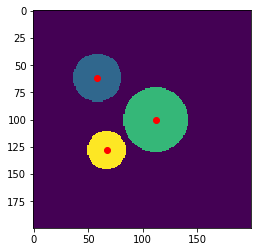

In [7]:
plt.imshow(labeled_nuclei)
plt.scatter([i[1] for i in coms],[i[0] for i in coms], color="red")

In [8]:
d = np.ones(labeled_nuclei.shape)
for i in coms:
    d[int(i[0]), int(i[1])] = 0
d = ndi.morphology.distance_transform_edt(d)

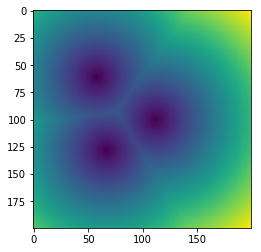

In [9]:
plt.imshow(d)

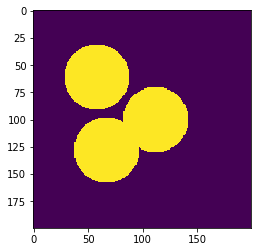

In [15]:
r = 30
mask = d < r
plt.imshow(mask)

In [16]:
final_labels = np.zeros(labeled_nuclei.shape)
for i in coms:
    final_labels[int(i[0]), int(i[1])] = 1
final_labels,_ = ndi.label(final_labels)

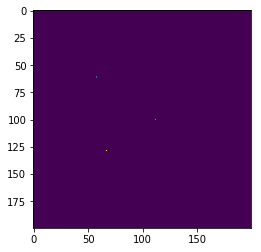

In [17]:
plt.imshow(final_labels)

In [18]:
final_segmentation = watershed(d, final_labels, mask=mask)


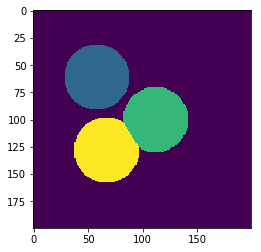

In [19]:
plt.imshow(final_segmentation)